In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
df=pd.read_csv("C:\\Users\\thris\\Desktop\\penguins.csv")
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,NaN,NaN,NaN,NaN,NaN
4,36.7,19.3,193.0,3450.0,FEMALE


In [40]:
df.isnull().sum()

culmen_length_mm     2
culmen_depth_mm      2
flipper_length_mm    2
body_mass_g          2
sex                  9
dtype: int64

In [41]:
df.shape

(344, 5)

In [42]:
df.dropna(inplace=True)

In [43]:
df.shape

(335, 5)

In [44]:
df.isnull().sum()

culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [45]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df["sex"]=le.fit_transform(df["sex"])

In [46]:
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,2
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1
4,36.7,19.3,193.0,3450.0,1
5,39.3,20.6,190.0,3650.0,2


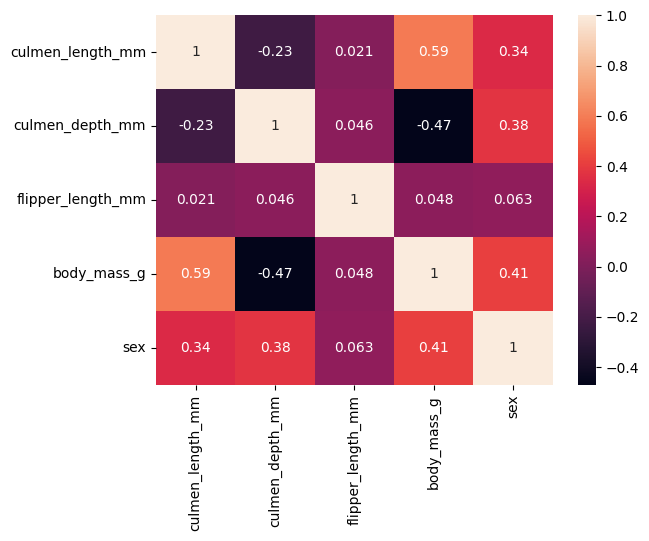

In [47]:
corr =df.corr()
sns.heatmap(corr ,annot=True)
plt.show()

In [48]:
col=df.columns

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

df=sc.fit_transform(df)

In [52]:
df=pd.DataFrame(df,columns=col)
df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,-0.897723,0.777263,-0.126893,-0.572233,0.985324
1,-0.824265,0.117037,-0.107872,-0.509923,-0.991224
2,-0.677349,0.421757,-0.073633,-1.195338,-0.991224
3,-1.338472,1.081983,-0.081242,-0.946096,-0.991224
4,-0.860994,1.742210,-0.092655,-0.696854,0.985324


In [53]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split

In [54]:
x_train,x_test=train_test_split(df,test_size=0.2,random_state=42)

In [55]:
kmeans=KMeans(n_clusters=2,n_init=4)

xlab=kmeans.fit(x_train)

In [56]:
kmeans.inertia_

655.0677481322042

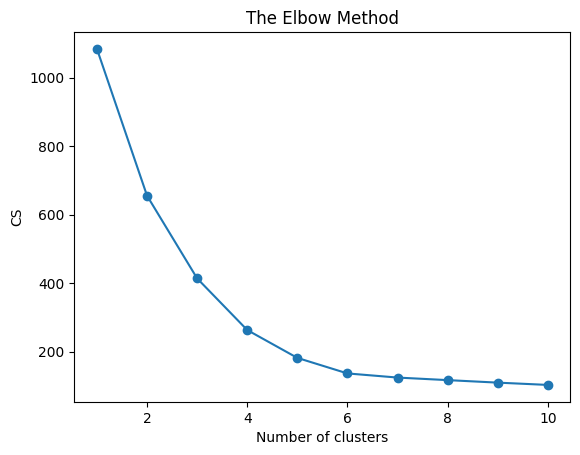

In [61]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x_train)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

Text(0, 0.5, 'Inertia')

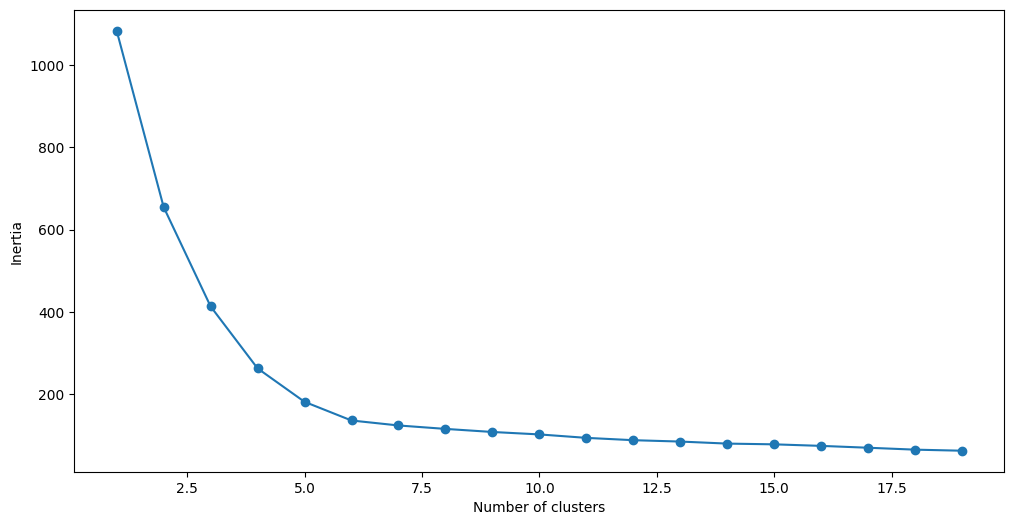

In [58]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(x_train)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [79]:
kmeans = KMeans(n_clusters = 6, init='k-means++')
y = kmeans.fit(x_train)
pred = y.predict(x_test)

C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [80]:
y.inertia_

136.0491854367696

In [81]:
silhouette_score(x_test,pred)

0.4044318627182348

In [82]:
frame = pd.DataFrame(x_test)
frame['cluster'] = pred
frame['cluster'].value_counts()

cluster
3    17
5    16
1    13
0    10
4     7
2     4
Name: count, dtype: int64

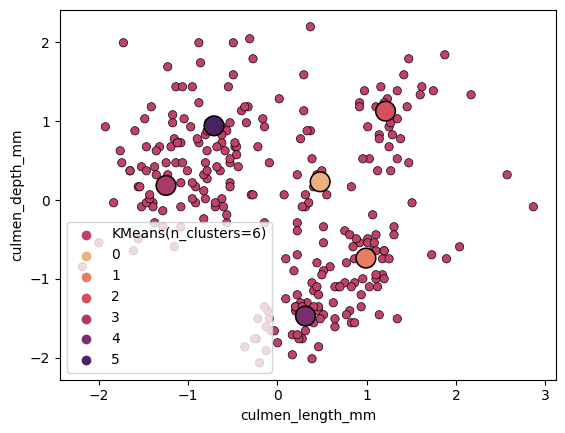

In [86]:
sns.scatterplot(x =x_train.iloc[ : ,0] ,y =x_train.iloc[ : ,1] ,
                data =x_train ,hue =y ,palette='flare' ,edgecolor ='k')

centers_df = pd.DataFrame(kmeans.cluster_centers_[: , :2], columns=['x', 'y'])
sns.scatterplot(x='x',y='y',data=centers_df,s=200,hue=range(len(centers_df)),
                palette='flare',edgecolor='k' ,markers="X")

plt.show()

In [87]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)

train_pca=pca.fit_transform(x_train)
test_pca=pca.fit_transform(x_test)

In [88]:
xd=pd.DataFrame(train_pca,columns=["PCA1","PCA2"])
xd.head(2)

,PCA1,PCA2
0,-0.324717,-0.980151
1,2.105580,-0.259312


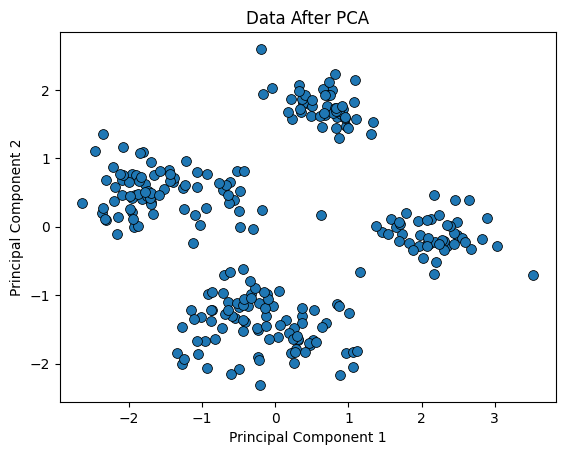

In [90]:
sns.scatterplot(x='PCA1'
                , y='PCA2'
                , data=xd
                , marker='o'
                , s=50
                , edgecolor='k')

plt.title('Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [103]:
td=pd.DataFrame(test_pca,columns=["PCA1","PCA2"])

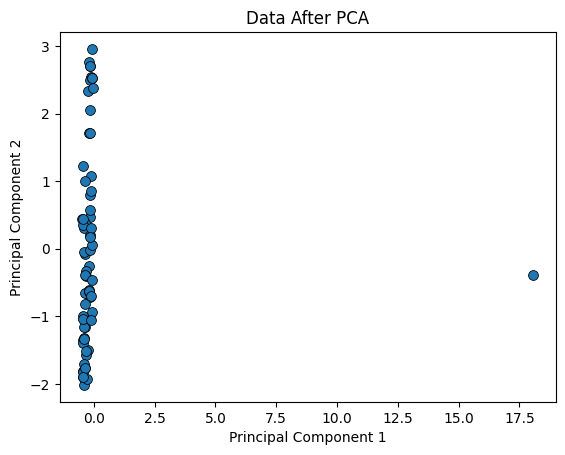

In [104]:
sns.scatterplot(x='PCA1'
                , y='PCA2'
                , data=td
                , marker='o'
                , s=50
                , edgecolor='k')

plt.title('Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

Text(0, 0.5, 'Inertia')

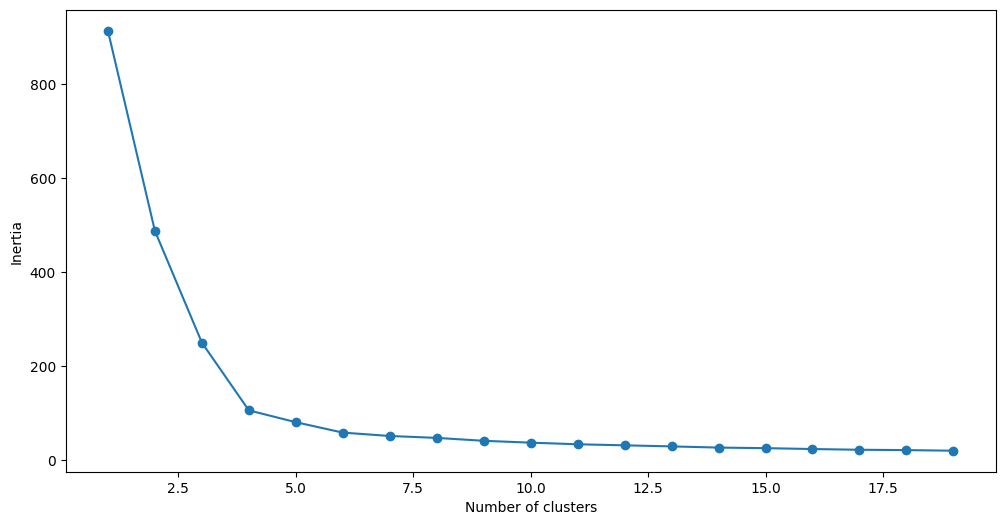

In [93]:
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(xd)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [97]:
kmeans=KMeans(n_clusters=4)
xx=kmeans.fit_predict(xd)

C:\Users\thris\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [98]:
silhouette_score(xd, xx)

0.6570975712889819

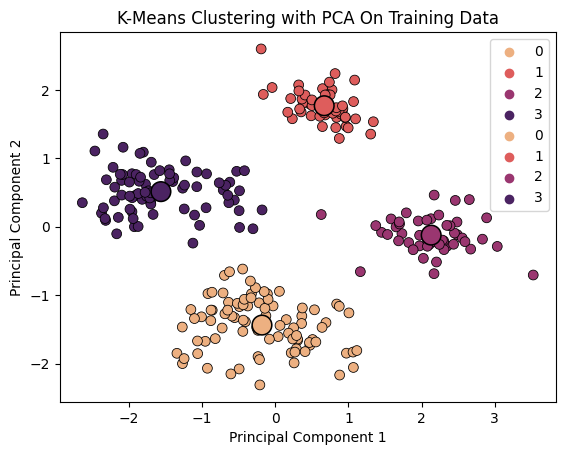

In [100]:
centers_df = pd.DataFrame(kmeans.cluster_centers_[: , :2], columns=['x', 'y'])

sns.scatterplot(x='PCA1'
                , y='PCA2' 
                ,data=xd
                , hue=xx
                , marker='o'
                , s=50
                ,palette='flare'
                ,edgecolor='k')

sns.scatterplot(x='x',y='y',data=centers_df,s=200,hue=range(len(centers_df)),
                palette='flare',edgecolor='k' ,markers="*")

plt.title('K-Means Clustering with PCA On Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()

In [105]:
yy=kmeans.predict(td)

In [106]:
silhouette_score(td,yy)

0.44192130987946293

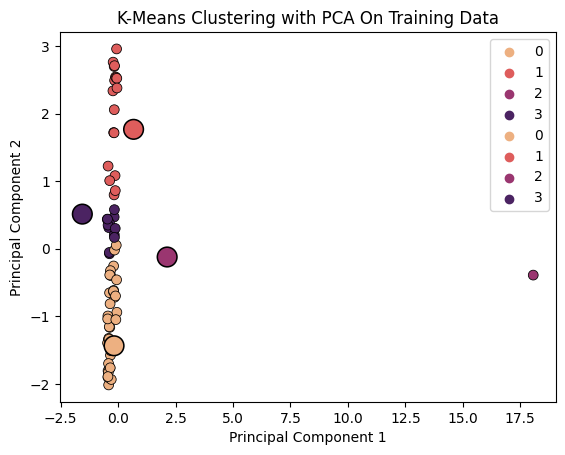

In [107]:
centers_df = pd.DataFrame(kmeans.cluster_centers_[: , :2], columns=['x', 'y'])

sns.scatterplot(x='PCA1'
                , y='PCA2' 
                ,data=td
                , hue=yy
                , marker='o'
                , s=50
                ,palette='flare'
                ,edgecolor='k')

sns.scatterplot(x='x',y='y',data=centers_df,s=200,hue=range(len(centers_df)),
                palette='flare',edgecolor='k' ,markers="*")

plt.title('K-Means Clustering with PCA On Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

plt.show()